## Problem Statement

##### During lab 3.01 I observed a potential correlation between squarefeet and price. This to me is a natural occurrence because property represented as area represents the non-depreciative asset of land ownership. Addtionally, having many conversations with Bede, there became a focus on the relationships between quality/conditon and salesprice.

##### This raises the question: Are descriptors of depreciation (quality/cond) better estimators of sales price than descriptors of value (property size by sqft)? 

#### H0: The true mean difference in RMSE between models who have more Qual/Cond features than those who do not is 0. 

#### H1: The true mean difference in RMSE between models who have more Qual/Cond features than those who do not is NOT 0. 

> $H_0: \mu_\text{trl_RMSE} - \mu_\text{ctrl_RMSE} = 0$ <br>
> $H_A: \mu_\text{trt_RMSE} - \mu_\text{ctrl_RMSE}\ne0$ <br>
### $$P(\text{data}\;|\;H_0 \text{ true})$$
$$\alpha=0.05$$


#### Method for Testing

- ##### Import Data
- ##### Observe and Clean Data
- ##### EDA Stats and EDA Visuals
- ##### Identify key Value and Cost Features
- ##### Create two models
    - ##### More Value than Qual/Cond Features
    - ##### More Qual/Cond than Value Features
- ##### Score and Record all R2 and RMSE scores from respective models
- ##### Plot Scores and Compare performance
- ##### Denote p-value and confidence level for RMSE scores 

In [10]:
# operating system
import os
# Data Manip & View
import pandas as pd
import missingno as msno
# Math
import numpy as np

Load Datasets

In [6]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

Lower snake case column heads

In [7]:
df_train.columns = [col.lower().replace(' ', '_') for col in df_train.columns]
df_test.columns =  [col.lower().replace(' ', '_') for col in df_test.columns]

In [8]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Fill in all current Pandas identified NaN values with np.nan

In [11]:
df_train.fillna(np.nan)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


Plot Missingno to get a birds eye view on the null values in this dataset

<AxesSubplot:>

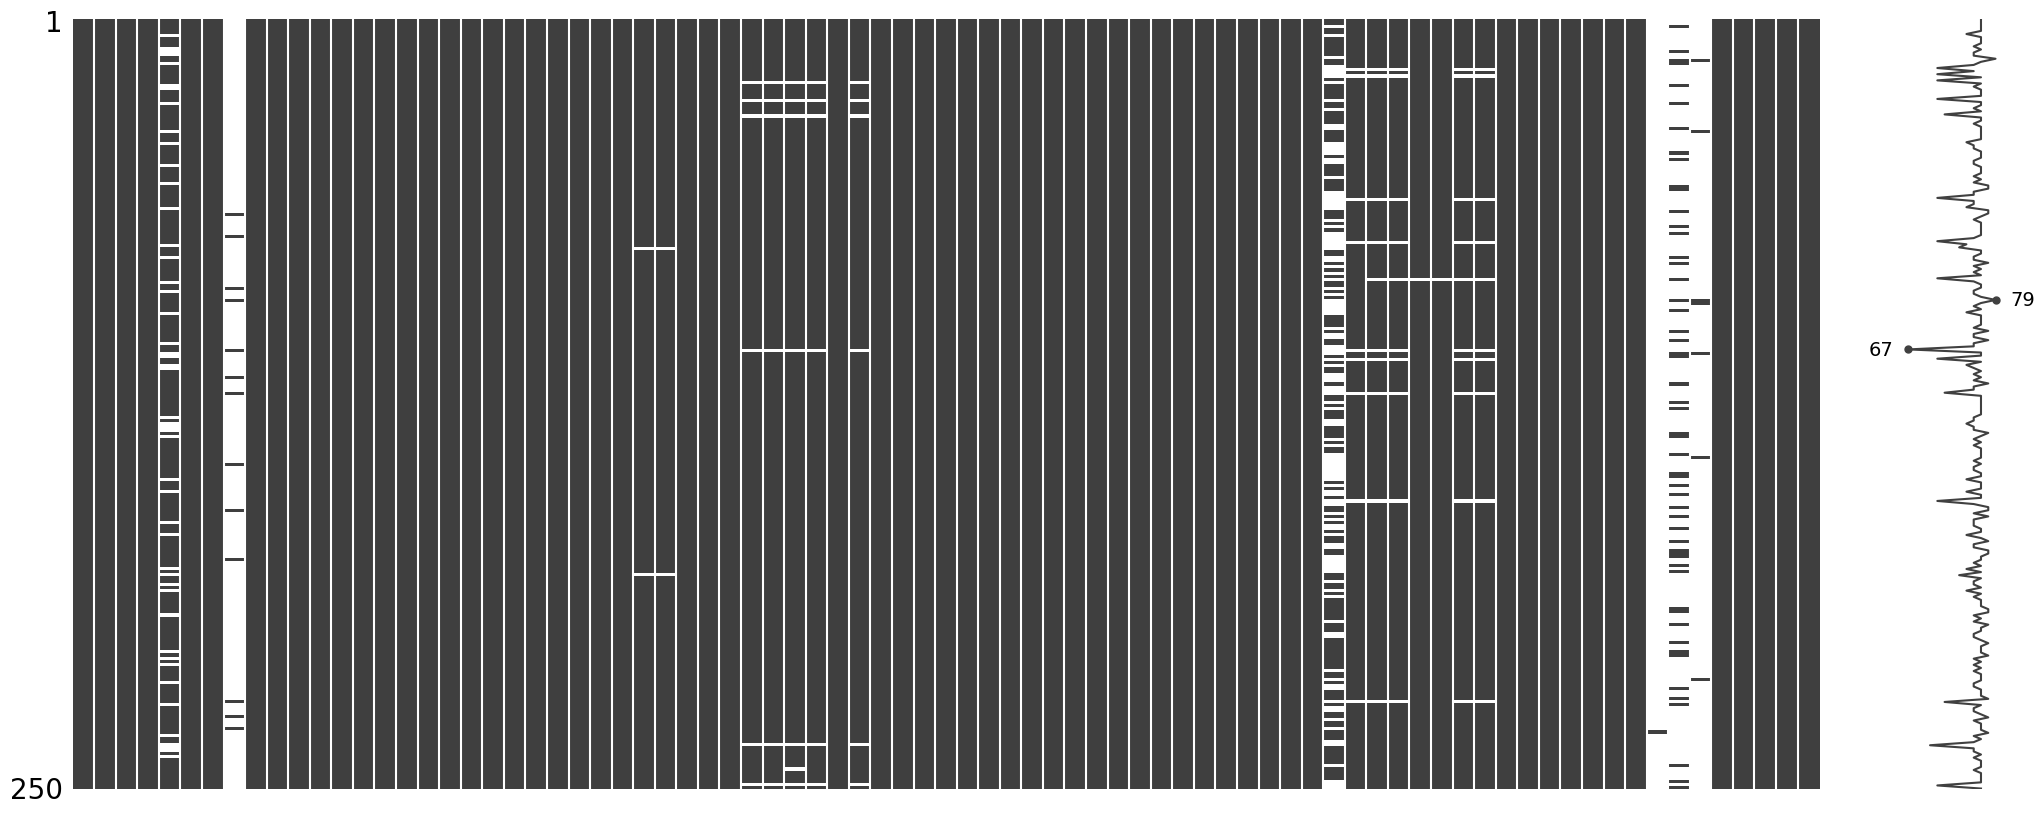

In [174]:
%matplotlib inline
msno.matrix(df_train.sample(250))

From the Missingno sample, we have 4 Features that appear to be mostly null, and 1 additional feature that is potentially 50% null. Let's dive deeper into the data to identify these null columns.

In [175]:
df_train.isnull().sum().sort_values(ascending=False)

pool_qc         2042
misc_feature    1986
alley           1911
fence           1651
fireplace_qu    1000
                ... 
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
saleprice          0
Length: 81, dtype: int64

We have identified the 5 categories that spotted during the Missingno null value population. Before we work on cleaning them, let's take a look at their unique values:

`pool_qc`: According to the data dictionary that comes with the dataset, Pool Quality has a range of 5 values:
`Ex:Excellent`, `Gd: Good`, `TA: Average/Typical`, `Fa: Fair`, `NA: No Pool`
It also has an assocated column called Pool Area with 2042 individual '0' values. This lines up perfectly with `pool_qc`'s 2042 null count. Safe to say that this data is NMAR and is actually because the area of Ames Iowa doesn't actually have that many pools in regards to sale records. Vote to remove column from the dataframe.

In [176]:
df_train['pool_area'].value_counts()

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: pool_area, dtype: int64

`misc_features`: According to the data dictionary that comes with the dataset, Misc Features has a range of 6 values:
`Elev: Elevator`, `Gar2: 2nd Garage`, `Othr: Other`, `Shed: Shed`, `TenC: Tennis Court`, `NA: None`
Similar to `pool_qc`, `misc_features` also has an associated column called `misc_val` with 1986 0 values. This lines up perfectly with `pool_qc`'s 1986 null count and can be explained with the NA value of the misc features column.

In [177]:
df_train['misc_val'].value_counts()

0        1986
400        12
500         8
600         6
450         5
2000        5
700         4
1200        2
3000        2
2500        2
4500        2
17000       1
1300        1
900         1
1500        1
800         1
6500        1
54          1
3500        1
1150        1
300         1
455         1
8300        1
460         1
12500       1
480         1
650         1
80          1
Name: misc_val, dtype: int64

`Alley`: According to the data dictionary that comes with the dataset, Pool Quality has a range of 3 values:
`Grvl: Gravel`, `Pave: Paved`, `NA: No Alley Access` <br>
`Alley` does not have a sister column to compare data with, however `Alley` does follow the same pattern of an NA value for None/No as seen in the previous features

In [178]:
df_train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

`Fence`: According to the data dictionary that comes with the dataset, `Fence` has a range of 5 values:
`GdPrv: Good Privacy`, `MnPrv: Minimum Privacy`, `GdWo: Good Wood`, `MnWw: Minimum Wood/Wire`, `NA: No Fence`
`Fence` does not have a sister column to compare data with. `Fence` does follow a similar pattern of an NA value for None/No.

#### For `pool_qc`,`misc_features`,`Alley`, and `Fence`, we have enough evidence to drop these columns from the dataframe. These features do not have enough observations to meaningfully impute values into them either.

In [12]:
df_train.drop(columns=['pool_qc','misc_feature','alley','fence'], inplace=True)
df_test.drop(columns=['pool_qc','misc_feature','alley','fence'], inplace=True)

In [180]:
# Check remaining null count, code sourced from speedrun
df_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

fireplace_qu      1000
lot_frontage       330
garage_cond        114
garage_yr_blt      114
garage_finish      114
garage_qual        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_qual           55
bsmt_cond           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
bsmtfin_sf_1         1
garage_area          1
garage_cars          1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
dtype: int64

#### Having dropped the 5 greatest counts of null let's turn our focus to the remaining starting with fireplace quality

In [181]:
df_train.groupby('fireplace_qu')['fireplaces'].value_counts()

fireplace_qu  fireplaces
Ex            1              29
              2               2
Fa            1              49
              2               9
              3               1
Gd            1             447
              2              74
              3               2
Po            1              31
TA            1             342
              2              61
              3               3
              4               1
Name: fireplaces, dtype: int64

In [182]:
df_train['fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

##### fireplace_qu follows the similar pattern that Alley, Fence, etc. did where one of the values for 'No Fireplaces' is NA which pandas registers as null. As the fireplaces feature also has 1000 observations with zero fireplaces, to preserve data quality let's fillna with a new string value that represents no fireplaces

In [13]:
df_train['fireplace_qu'].fillna('no_fp',inplace=True)

In [184]:
df_train['fireplace_qu'].isnull().sum()

0

In [185]:
df_train['fireplace_qu'].value_counts()

no_fp    1000
Gd        523
TA        407
Fa         59
Po         31
Ex         31
Name: fireplace_qu, dtype: int64

In order to preserve data quality for the rest of the features, let's fill in median for numerical features and mode for categorical features. Median for numerical because it is a more robust option that mitigates the effects of outliers, while Mean includes the outliers in its calculation.

In [14]:
# save respective index for merge
train_id = df_train['id']
test_id = df_test['id']

In [187]:
# split each set into it's own split of number and object dataframes to be transformed
df_train_num = df_train.select_dtypes('number')
df_train_obj = df_train.select_dtypes('object')
df_test_num = df_test.select_dtypes('number')
df_test_obj = df_test.select_dtypes('object')

In [188]:
# Check Shape sizes
df_train_num.shape, df_test_num.shape, df_train_obj.shape, df_test_obj.shape

((2051, 39), (878, 38), (2051, 38), (878, 38))

In [189]:
df_train_num.head(1)

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500


In [190]:
# set variable lists for each type of 
nums = [df_train_num, df_test_num]
objs = [df_train_obj, df_test_obj]

for num in nums:
    # for each column
    for col in num.columns:
        # fill na values with column median
        num[col].fillna(num[col].median(), inplace = True)
        
for obj in objs:
    # for each column
    for col in obj.columns:
        # fill na values with column mode as index[0] of value counts of that column
        obj[col].fillna(obj[col].value_counts().index[0], inplace = True) 

In [193]:
df_train_num.isnull().sum().sum(),df_test_num.isnull().sum().sum(),\
df_train_obj.isnull().sum().sum(),df_test_obj.isnull().sum().sum()

(0, 0, 0, 0)

##### All null values have been cleared from all splits, let's merge the respective dataframes back together to save, and load the new cleaned data sets in a new file devoted to EDA. With the amount of features both numerical and categorical, we are going to need a blank canvas to showcase the findings appropriately.

In [194]:
# add original dataframe index back to the objects
df_train_obj['id'] = train_id
df_test_obj['id'] = test_id

In [195]:
# merge the split dataframes for test and train on the index column
df_train_clean = df_train_num.merge(df_train_obj, how='left', on='id')
df_test_clean = df_test_num.merge(df_test_obj, how='left', on='id')

In [197]:
# check if shapes line up appropriately
df_train_clean.shape, df_test_clean.shape

((2051, 77), (878, 76))

In [198]:
# save cleaned datasets for later use
df_train_clean.to_csv('../cleaned_datasets/cleaned_train.csv')
df_test_clean.to_csv('../cleaned_datasets/cleaned_test.csv')